In [132]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [133]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [134]:
NUM_CLASSES = 21

# Dataset reading

In [135]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [136]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [138]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [139]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_16 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 21)             │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,301 (5.08 KB)

 Trainable params: 1,301 (5.08 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [141]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [144]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7031 - loss: 0.8645
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6946 - loss: 0.8896 - val_accuracy: 0.9545 - val_loss: 0.3754
Epoch 2/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6484 - loss: 0.9785
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - loss: 0.9032 - val_accuracy: 0.9528 - val_loss: 0.3746
Epoch 3/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7031 - loss: 0.8310
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - loss: 0.8781 - val_accuracy: 0.9519 - val_loss: 0.3809
Epoch 4/1000
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7188 - loss: 0.7449
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras


In [145]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9403 - loss: 0.3669 


In [146]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [147]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[5.56124549e-04 7.73286307e-03 1.30556233e-04 5.81747115e-01
 1.89680420e-03 2.25218199e-03 2.29748635e-04 7.28412342e-05
 4.35101381e-03 3.90939182e-03 1.93579588e-04 2.40315683e-04
 3.92290589e-04 6.55678436e-02 4.00843173e-02 7.41863018e-03
 4.20185970e-03 1.49819717e-01 1.08132325e-01 2.02067774e-02
 8.63832654e-04]
3


# Confusion matrix

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


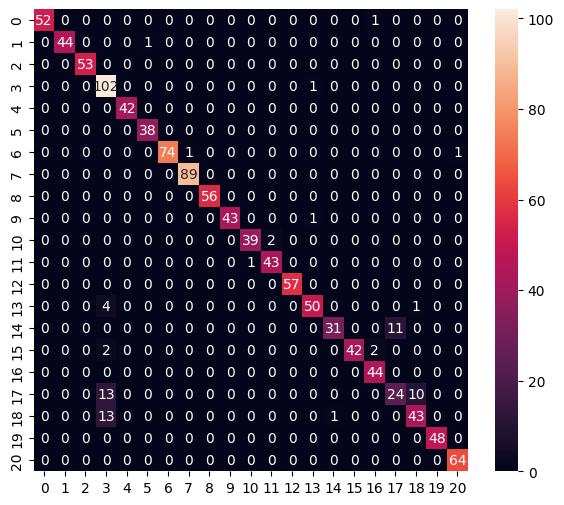

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       1.00      0.98      0.99        45
           2       1.00      1.00      1.00        53
           3       0.76      0.99      0.86       103
           4       1.00      1.00      1.00        42
           5       0.97      1.00      0.99        38
           6       1.00      0.97      0.99        76
           7       0.99      1.00      0.99        89
           8       1.00      1.00      1.00        56
           9       1.00      0.98      0.99        44
          10       0.97      0.95      0.96        41
          11       0.96      0.98      0.97        44
          12       1.00      1.00      1.00        57
          13       0.96      0.91      0.93        55
          14       0.97      0.74      0.84        42
          15       1.00      0.91      0.95        46
          16       0.94      1.00      0.97        44
     

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [149]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [150]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/cc/823_rgr94q9bcr879x982_6w0000gn/T/tmpxa_69lkl/assets


INFO:tensorflow:Assets written to: /var/folders/cc/823_rgr94q9bcr879x982_6w0000gn/T/tmpxa_69lkl/assets


Saved artifact at '/var/folders/cc/823_rgr94q9bcr879x982_6w0000gn/T/tmpxa_69lkl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_8')
Output Type:
  TensorSpec(shape=(None, 21), dtype=tf.float32, name=None)
Captures:
  14220229520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14220227408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14311173456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14311177872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14311174992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14311174032: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1734920462.563006 28985878 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1734920462.563020 28985878 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


7320

# Inference test

In [151]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [152]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [153]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [154]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 201 μs, sys: 77 μs, total: 278 μs
Wall time: 279 μs


In [155]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.5612554e-04 7.7328691e-03 1.3055622e-04 5.8174700e-01 1.8968057e-03
 2.2521839e-03 2.2974901e-04 7.2841365e-05 4.3510208e-03 3.9093946e-03
 1.9357973e-04 2.4031565e-04 3.9229088e-04 6.5567859e-02 4.0084325e-02
 7.4186316e-03 4.2018611e-03 1.4981975e-01 1.0813231e-01 2.0206776e-02
 8.6383417e-04]
3
